# **Finding Outliers**

## Dataset Used

I am going to use the `clean_survey_data.csv` file I exported at the end of the data wrangling process.

## Objectives 

* Connect to a sqlite3
* Load the dataset into the database as a table
* Find outliers in the compensation columns
* Remove outliers for better visualizations
* Store results in different tables in the database

## Download and Import Libraries

In [ ]:
# Run this cell if the libraries are not installed
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install sqlite3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

## Load the dataset

In [3]:
# Read the data in a dataframe
data = pd.read_csv('clean_survey_data.csv')

# Set options to display max columns
pd.set_option('display.max_columns', None)

# Preview the data
data.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCode_MinMax,YearsCodePro,ExperienceLevel,YearsCodePro_Zscore,DevType,Country,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,WorkExp,ConvertedCompYearly,JobSat
0,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",20,0.40,17,Architect,0.812509,"Developer, full-stack",United Kingdom of Great Britain and Northern I...,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,17.0,NaN,NaN
1,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,"Master's degree (M.A., M.S., M.Eng., MBA, etc.)",37,0.74,27,Architect,2.010883,Developer Experience,United Kingdom of Great Britain and Northern I...,NaN,C#,C#,Firebase Realtime Database,Firebase Realtime Database,Google Cloud,Google Cloud,ASP.NET CORE,ASP.NET CORE,MSBuild,MSBuild,Visual Studio,Visual Studio,NaN,NaN,NaN
2,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Some college/university study without earning ...,4,0.08,10,Lead,-0.026352,"Developer, full-stack",Canada,NaN,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...,MongoDB;MySQL;PostgreSQL;SQLite,MongoDB;MySQL;PostgreSQL,Amazon Web Services (AWS);Fly.io;Heroku,Amazon Web Services (AWS);Vercel,jQuery;Next.js;Node.js;React;WordPress,jQuery;Next.js;Node.js;React,Docker;npm;Pip,Docker;Kubernetes;npm,NaN,NaN,NaN,NaN,NaN
3,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)","Secondary school (e.g. American high school, G...",9,0.18,10,Lead,-0.026352,"Developer, full-stack",Norway,NaN,C++;HTML/CSS;JavaScript;Lua;Python;Rust,C++;HTML/CSS;JavaScript;Lua;Python,PostgreSQL;SQLite,PostgreSQL;SQLite,NaN,NaN,NaN,NaN,APT;Make;npm,APT;Make,Vim,Vim,NaN,NaN,NaN
4,6,I code primarily as a hobby,Under 18 years old,"Student, full-time","Hybrid (some remote, some in-person)",Primary/elementary school,10,0.20,10,Lead,-0.026352,Student,United States of America,NaN,Bash/Shell (all shells);HTML/CSS;Java;JavaScri...,Bash/Shell (all shells);HTML/CSS;Java;JavaScri...,Cloud Firestore,Cloud Firestore,Cloudflare,Cloudflare,Node.js,Node.js,Docker;Homebrew;npm;Pip;pnpm,Homebrew;npm;Pip;pnpm,Nano;Vim;Visual Studio Code;Xcode,Nano;Vim;Visual Studio Code;Xcode,NaN,NaN,NaN


## Create a SQLite Database

In [2]:
# Create a connection to the SQLite database named 'survey-data.db'
conn = sqlite3.connect('survey-data.db')

In [ ]:
# Write the dataframe to the SQLite database as a table called 'main'
data.to_sql('main', conn, if_exists='replace', index=False)

59745

In [3]:
# Run a query to check
df = pd.read_sql("SELECT * FROM main", conn)

df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCode_MinMax,YearsCodePro,ExperienceLevel,...,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,WorkExp,ConvertedCompYearly,JobSat
0,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",20,0.40,17,Architect,...,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,17.0,NaN,NaN
1,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,"Master's degree (M.A., M.S., M.Eng., MBA, etc.)",37,0.74,27,Architect,...,Google Cloud,ASP.NET CORE,ASP.NET CORE,MSBuild,MSBuild,Visual Studio,Visual Studio,NaN,NaN,NaN
2,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Some college/university study without earning ...,4,0.08,10,Lead,...,Amazon Web Services (AWS);Vercel,jQuery;Next.js;Node.js;React;WordPress,jQuery;Next.js;Node.js;React,Docker;npm;Pip,Docker;Kubernetes;npm,None,None,NaN,NaN,NaN
3,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)","Secondary school (e.g. American high school, G...",9,0.18,10,Lead,...,None,None,None,APT;Make;npm,APT;Make,Vim,Vim,NaN,NaN,NaN
4,6,I code primarily as a hobby,Under 18 years old,"Student, full-time","Hybrid (some remote, some in-person)",Primary/elementary school,10,0.20,10,Lead,...,Cloudflare,Node.js,Node.js,Docker;Homebrew;npm;Pip;pnpm,Homebrew;npm;Pip;pnpm,Nano;Vim;Visual Studio Code;Xcode,Nano;Vim;Visual Studio Code;Xcode,NaN,NaN,NaN


## Handling Outliers in Total Compensation

In order to find outliers, I need to determine the lower and upper bounds using the 1.5 Inter quartile Range (IQR) rule. First, I am going find the first and third quartiles to calculate the IQR. It will be nice to have a dataset without the outliers in `CompTotal`. Therefore, I am going the save the results in a new table in the database. This will also make it convient to access the table in different files.

### Finding Outliers

In [ ]:
# Finding the quartiles 
df['CompTotal'].describe()

count     3.342800e+04
mean     2.991504e+145
std      5.469464e+147
min       0.000000e+00
25%       6.000000e+04
50%       1.100000e+05
75%       2.500000e+05
max      1.000000e+150
Name: CompTotal, dtype: float64

In [12]:
# Calculate the IQR
Q1 = 6.000000e+04
Q3 = 2.500000e+05
IQR = Q3 - Q1

# Finding the bounds
lower_bounds = Q1 - (1.5 * IQR)
upper_bounds = Q3 + (1.5 * IQR)

### Removing Outliers

I will filter out the outliers and save the result in a new dataframe. Then, I will write the new dataframe to a new table in the `survey-data.db` database. This will keep the original table in tact and make it easy to retrieve it.

In [13]:
# Create a new df with no outliers in CompTotal
no_out_CompTotal = df[(df['CompTotal'] >= lower_bounds) & (df['CompTotal'] <= upper_bounds)]

# Create a new table called noOutCompT in the database
no_out_CompTotal.to_sql('noOutCompT', conn, if_exists='replace', index=False)

27607

## Handling Outliers in Yearly Compensation

I will perform the same steps to handle outliers in the `ConvertedCompYearly` column. A new table in the database will also be created to separate the data.

### Finding Outliers

In [12]:
# Finding the quartiles 
df['ConvertedCompYearly'].describe()

count    2.335200e+04
mean     8.516649e+04
std      1.427830e+05
min      1.000000e+00
25%      3.286600e+04
50%      6.500000e+04
75%      1.080000e+05
max      1.381802e+07
Name: ConvertedCompYearly, dtype: float64

In [6]:
# Calculate the IQR
Q1 = 3.286600e+04
Q3 = 1.080000e+05
IQR = Q3 - Q1

# Finding the bounds
lower_bounds = Q1 - (1.5 * IQR)
upper_bounds = Q3 + (1.5 * IQR)

### Removing Outliers

In [7]:
# Create a new df with no outliers in CompTotal
no_out_CompYear = df[(df['ConvertedCompYearly'] >= lower_bounds) & (df['ConvertedCompYearly'] <= upper_bounds)]

# Create a new table called noOutCompY in the database
no_out_CompYear.to_sql('noOutCompY', conn, if_exists='replace', index=False)

22377

## Verify the Tables in SQLite

In [ ]:
# SQL query to select the table names
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
# Read the query to a df
pd.read_sql_query(QUERY, conn)

,Table_Name
0,main
1,noOutCompT
2,noOutCompY


We can see that all three tables are present in the database.

## Distribution of Total Compensation

Now that we removed outliers, let's visualize the distribution of `CompTotal`.

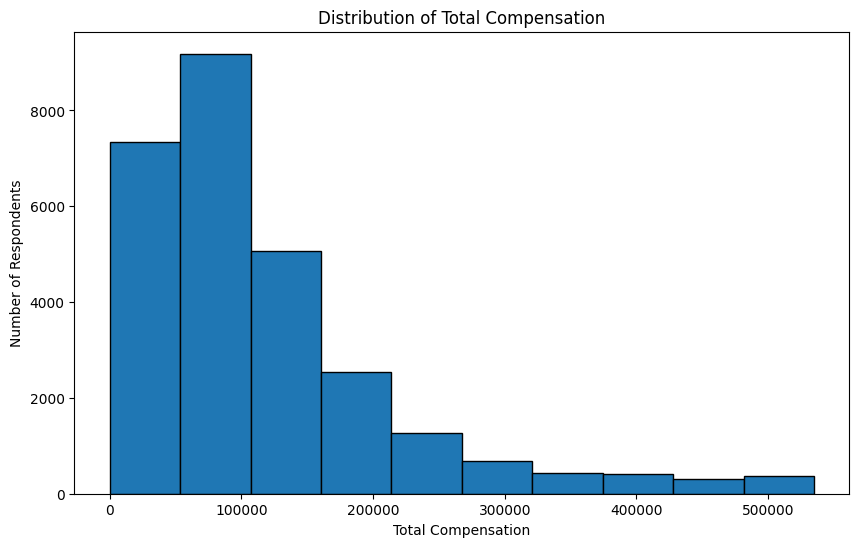

In [29]:
# Plot the histogram
fig, ax = plt.subplots(figsize=(10,6))

ax.hist(no_out_CompTotal['CompTotal'], edgecolor='black')
ax.set_title("Distribution of Total Compensation")
ax.set_xlabel("Total Compensation")
ax.set_ylabel("Number of Respondents")
plt.show()

Based on the data with no outliers, the majority of participants has compensation in the range from 0-100000. As the compensation increases, the frequency decreases. 

## Distribution of Yearly Compensation

Let's visualize `ConvertedCompYearly` with no outliers.

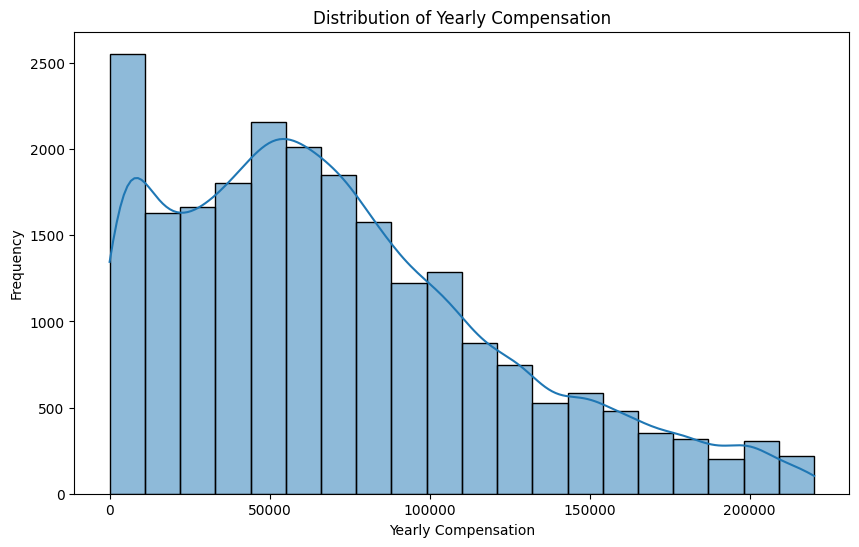

In [27]:
# Plot the histogram with a KDE
fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(no_out_CompYear, x='ConvertedCompYearly', kde=True, bins=20, ax=ax)
ax.set_title("Distribution of Yearly Compensation")
ax.set_xlabel("Yearly Compensation" )
ax.set_ylabel("Frequency")
plt.show()


This graph also has a similar trend like the previous histogram. There are a higher frequency when yearly compensation is lower and lower frequency when yearly compensation is higher. Interestingly, the first bin on the left has the highest frequency. This probably reflects the students without jobs and part timers. 

## Median Compensation by Age Groups

Let's explore to see how the median yearly compensation (`ConvertedCompYearly`)compares across each age group (`Age`).

In [ ]:
# Store the group in a separate df
age_compY_group = no_out_CompYear[['Age', 'ConvertedCompYearly']].groupby('Age')['ConvertedCompYearly'].median().reset_index()

# Set the order of the age ranges
order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say']
age_compY_group['Age'] = pd.Categorical(age_compY_group['Age'], categories=order, ordered=True)
age_compY_group = age_compY_group.sort_values('Age')

age_compY_group

,Age,ConvertedCompYearly
7,Under 18 years old,7253.0
0,18-24 years old,24731.0
1,25-34 years old,58000.0
2,35-44 years old,80000.0
3,45-54 years old,91295.0
4,55-64 years old,105000.0
5,65 years or older,100000.0
6,Prefer not to say,133023.5


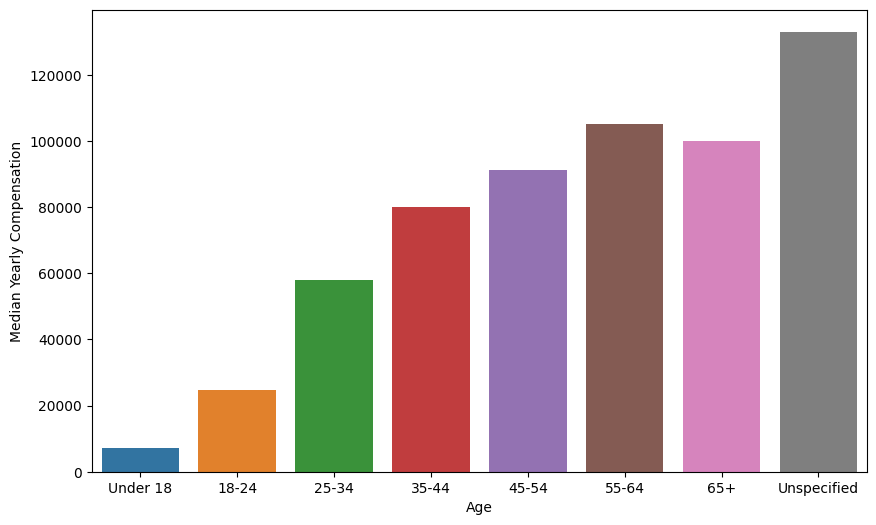

In [ ]:
# Define labels for each tick
labels = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+', 'Unspecified']

# Plot the bar plot
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(age_compY_group, x='Age', y='ConvertedCompYearly', hue='Age', ax=ax)
ax.set_ylabel("Median Yearly Compensation")
ax.set_xticks(order)
ax.set_xticklabels(labels)
plt.show()

This bar plot shows us that the median yearly compensation generally increases as age increases. The age group 65+ has a slight decrease than group 55-64 but is still higher than 45-54. Interestingly, the unspecified group has the highest median yearly compensation. This could have shifted some groups if every participant specified their age range. 

## Using Box Plots

Box plots are a good visualization tool for spotting outliers. Elements in a box plot include the lower bounds, 1st quartile, median, 3rd quartile, upper bounds, and outliers. The outliers are usually dots placed below or above the bounds. 

### Yearly Compensation

Let's use the no outlier data and see how it looks like.

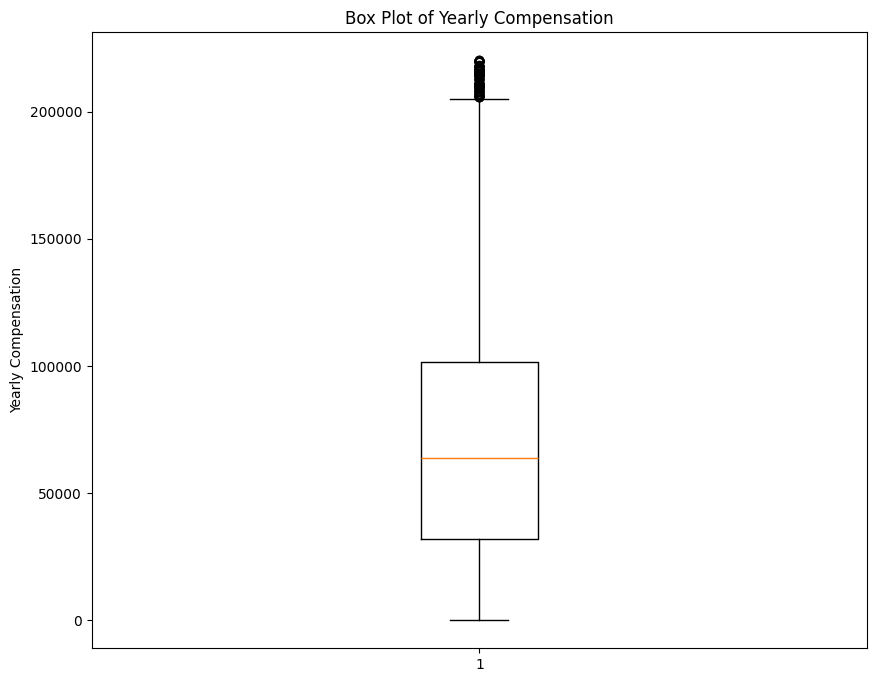

In [ ]:
# Plot the box plot
fig, ax = plt.subplots(figsize=(10,8))

ax.boxplot(no_out_CompYear['ConvertedCompYearly'])
ax.set_title("Box Plot of Yearly Compensation")
ax.set_ylabel("Yearly Compensation")
plt.show()

The plot shows some outliers since the ranges are different from the original data. We can see that the median is probably around 60000. 

### Yearly Compensation by Dev Type

Let's dive a little deeper and explore how a box plot will look like for the top 5 developer types (`DevType`).

In [ ]:
# Create a cursor to execute a query
cursor = conn.cursor()

In [ ]:
# Query to find the top 5 dev types
# Store the result in a new view
QUERY = """
CREATE VIEW Top5Dev AS 
SELECT DevType, COUNT(*) AS 'Count'
FROM noOutCompY
WHERE DevType IS NOT NULL
GROUP BY DevType
ORDER BY Count DESC
LIMIT 5;
"""

# Execute the query
cursor.execute(QUERY)

In [ ]:
# Preview the created view
pd.read_sql("SELECT * FROM Top5Dev", conn)

,DevType,Count
0,"Developer, full-stack",8049
1,"Developer, back-end",4519
2,"Developer, front-end",1381
3,"Developer, desktop or enterprise applications",1019
4,"Developer, mobile",776


In [ ]:
# Query for the top 5 developers types and their compensation
QUERY = """
SELECT DevType, ConvertedCompYearly
FROM noOutCompY 
WHERE DevType in (SELECT DevType FROM Top5Dev)
"""

# Read the query to a df
top5_dev = pd.read_sql(QUERY, conn)

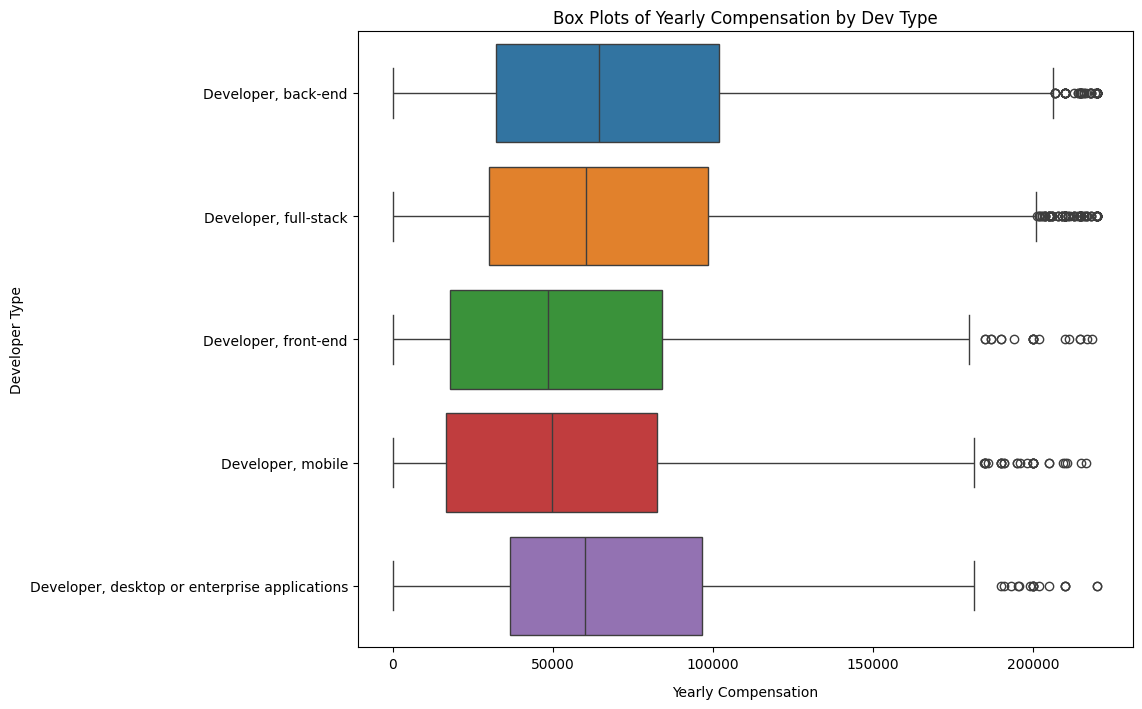

In [38]:
# Plot the box plots
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(top5_dev, x='ConvertedCompYearly',y='DevType',hue='DevType', ax = ax)
ax.set_title("Box Plots of Yearly Compensation by Dev Type")
ax.set_ylabel("Developer Type")
ax.set_xlabel("Yearly Compensation", labelpad=10)

plt.show()

It seems like there isn't really a huge apparent difference between the dev types. The median yearly compensation for each dev type is around 50000-60000. 

## Close the Connection

In [39]:
# Remember to close the connection with the database at the end
conn.close()